In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torchvision.transforms as T
from IPython.display import clear_output
from matplotlib import cm
from time import perf_counter
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm
from PIL import Image

### Загрузка изображения

In [8]:
!curl -O "https://static.independent.co.uk/2021/10/29/14/newFile-8.jpg?width=1200" --output peter.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  109k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  109k  100  109k    0     0   208k      0 --:--:-- --:--:-- --:--:--  209k


### Чтение изображения

In [11]:
img = Image.open('peter.jpg')

In [12]:
img.format

'JPEG'

In [13]:
img.size

(1200, 899)

In [14]:
img.mode

'RGB'

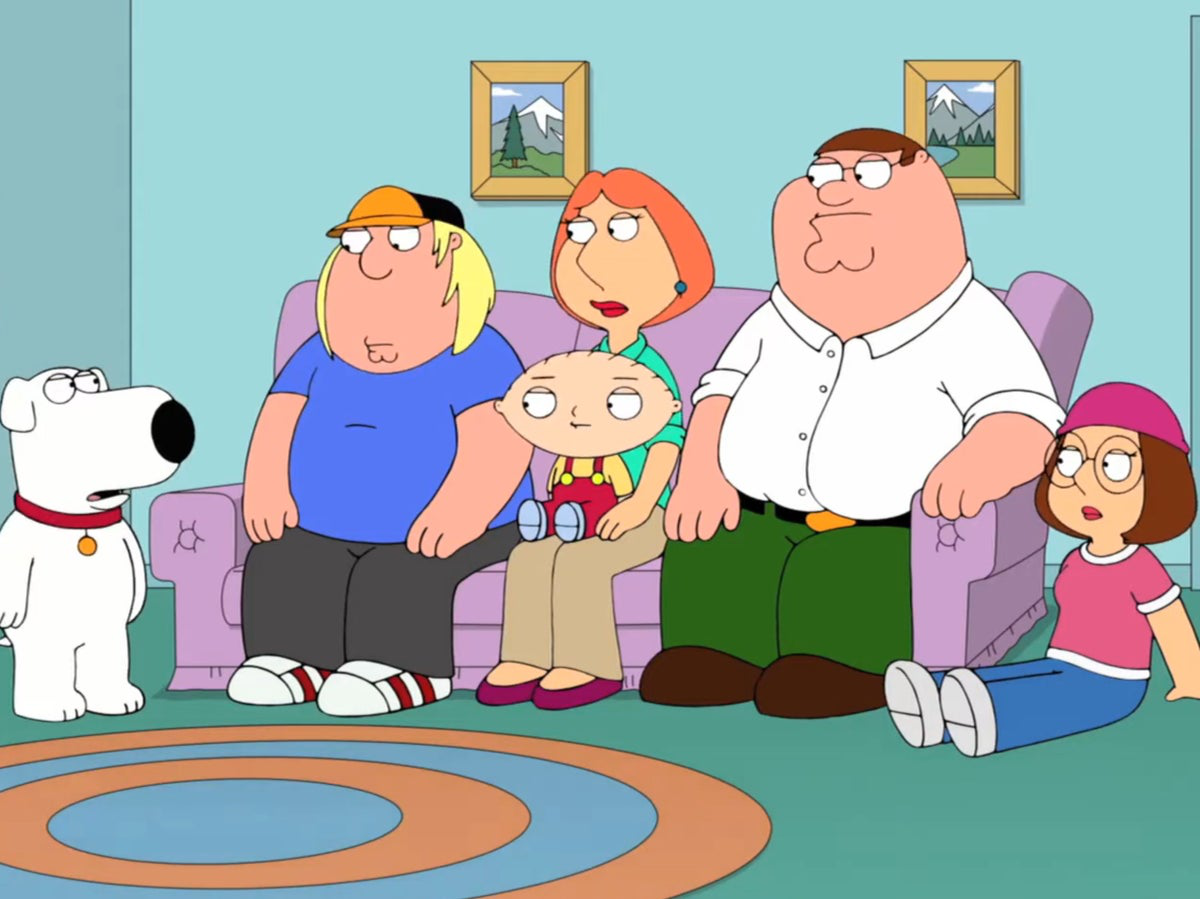

In [15]:
img

### Матричное представление

In [16]:
img_matrix = np.array(img)

In [18]:
img_matrix.shape # 3 канала

(899, 1200, 3)

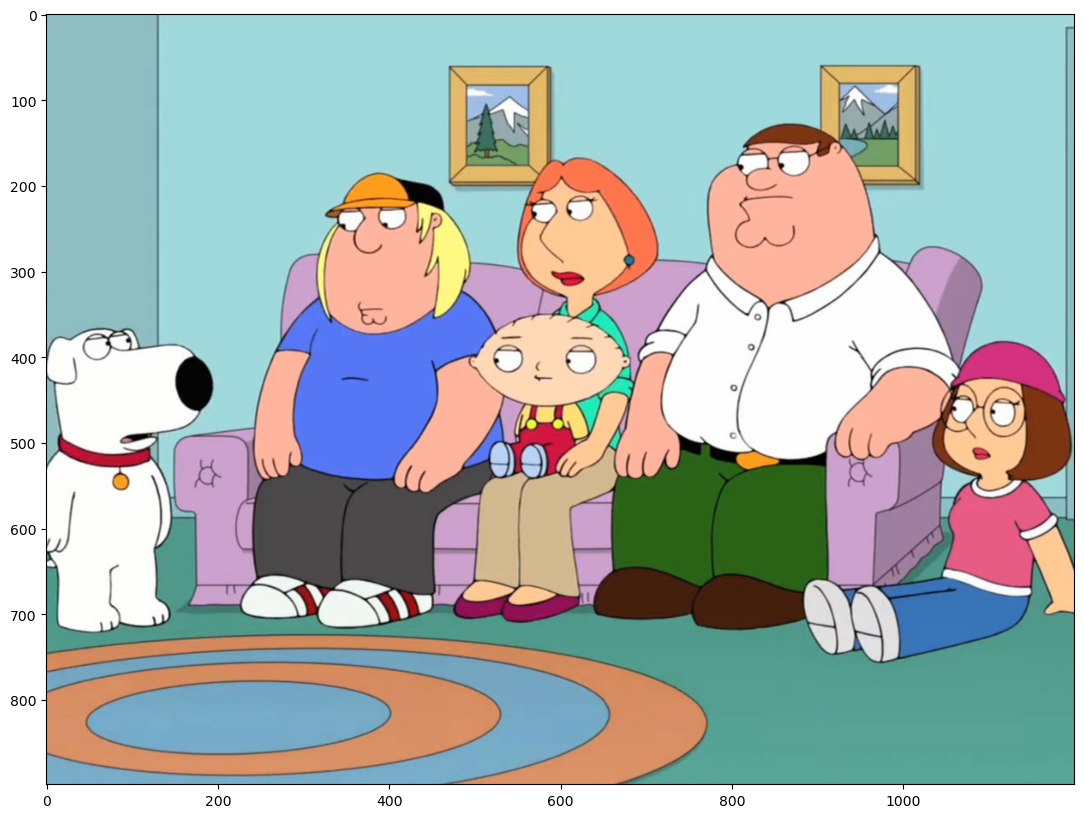

In [21]:
plt.figure(figsize = (20, 10))

plt.imshow(img_matrix)

plt.show()

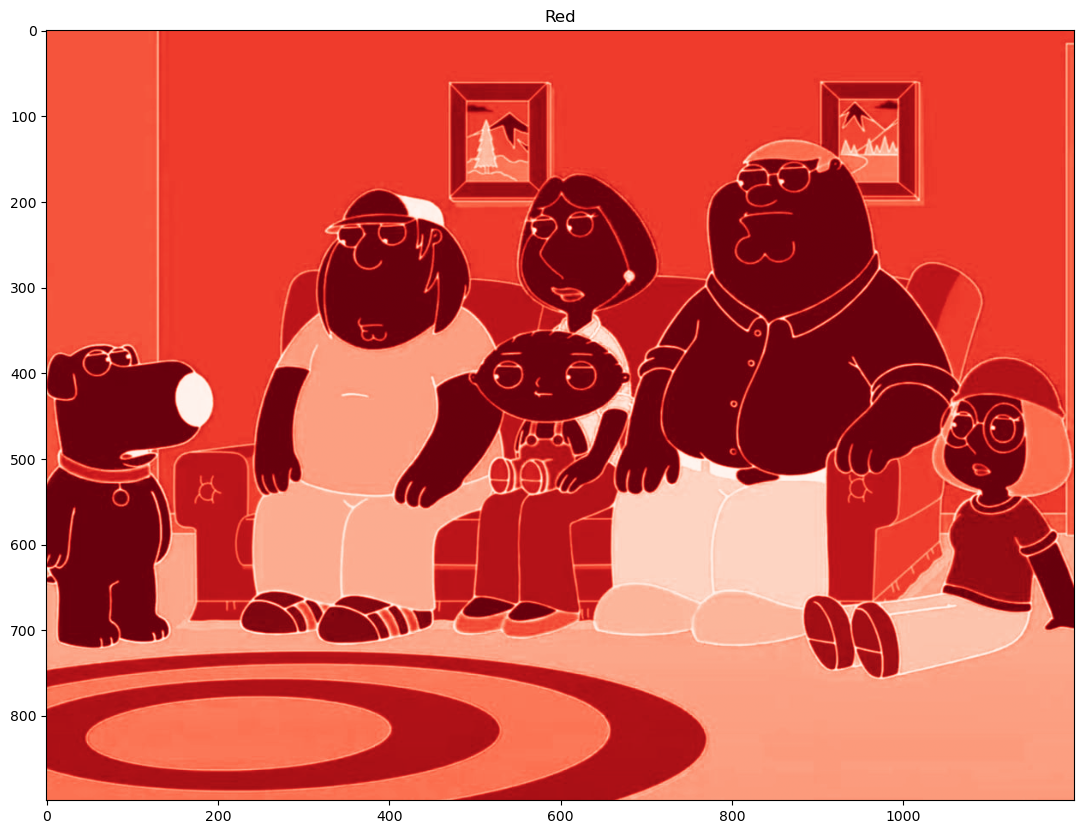

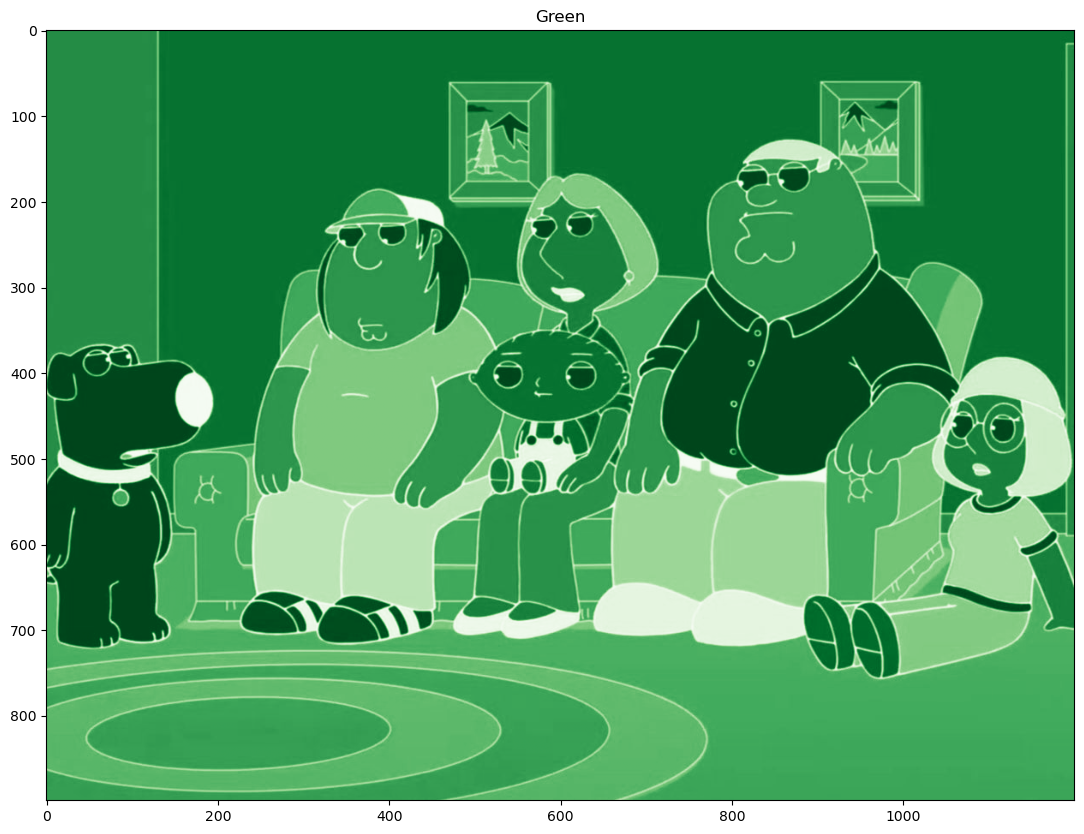

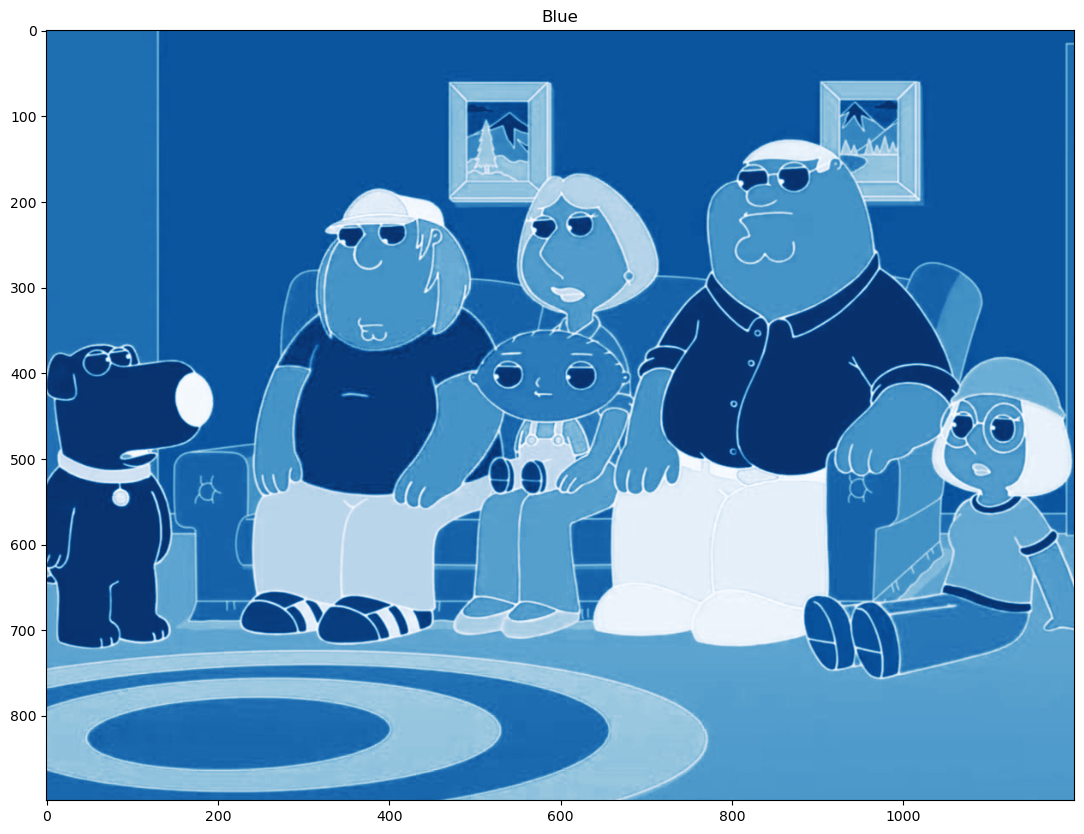

In [22]:
for i, (cmap, color) in enumerate(
    zip(
        [cm.Reds, cm.Greens, cm.Blues],
        ['Red', 'Green', 'Blue']
    )
):
    plt.figure(figsize = (20, 10))
    plt.imshow(img_matrix[:, :, i], cmap = cmap)
    plt.title(color)
    plt.show()

In [23]:
img_matrix[:, :, 0].min(), img_matrix[:, :, 0].max()

(np.uint8(0), np.uint8(255))

In [25]:
img_matrix

array([[[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [157, 218, 219],
        [157, 218, 219],
        [157, 218, 219]],

       [[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [157, 218, 219],
        [157, 218, 219],
        [157, 218, 219]],

       [[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [158, 218, 219],
        [158, 218, 219],
        [158, 218, 219]],

       ...,

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]],

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]],

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]]

### Свертка

#### Обязательные параметры свертки 
1. in_channels
2. out_channels
3. kernel_size - размер ядра свертки

#### Дополнительные параметры
1. stride - шаг ядра свертки (по умолчанию: 1)
2. padding - Размер паддинга (по умолчанию: 0)
3. padding_mode - 'zeros', 'reflect', 'replicate' or 'circular' (по умолчанию: 'zeros')
4. dilation - Шаг между элементами внутри ядра (по умолчанию: 1)
5. bias - Обучаемый сдвиг (по умолчанию: True)

In [26]:
conv1 = nn.Conv2d(
    in_channels = 3,
    out_channels = 10,
    kernel_size = 3
)

In [27]:
img_tensor = T.ToTensor()(img).unsqueeze(0)

In [28]:
img_tensor.shape

torch.Size([1, 3, 899, 1200])

In [29]:
output = conv1(img_tensor)

In [30]:
output.shape

torch.Size([1, 10, 897, 1198])

In [31]:
conv2 = nn.Conv2d(
    in_channels = 3,
    out_channels = 10,
    kernel_size = 3,
    padding = 1
)

In [32]:
output = conv2(img_tensor)

In [33]:
output.shape

torch.Size([1, 10, 899, 1200])

### Пулинг

In [34]:
img_tensor = torch.randint(0, 10, size = (10, 10), dtype = torch.float32).unsqueeze(0)

In [35]:
img_tensor

tensor([[[2., 1., 6., 1., 7., 0., 4., 3., 2., 3.],
         [7., 7., 1., 9., 0., 7., 2., 4., 6., 5.],
         [2., 2., 9., 0., 6., 4., 7., 3., 4., 8.],
         [9., 7., 0., 4., 1., 2., 6., 9., 5., 3.],
         [2., 3., 5., 3., 9., 9., 4., 5., 3., 4.],
         [3., 0., 1., 2., 2., 4., 1., 6., 2., 5.],
         [9., 5., 2., 1., 5., 6., 4., 9., 3., 6.],
         [5., 7., 2., 9., 0., 6., 6., 1., 4., 4.],
         [4., 0., 7., 9., 1., 8., 3., 4., 4., 2.],
         [3., 4., 6., 8., 3., 1., 8., 7., 7., 8.]]])

In [36]:
pooling1 = nn.MaxPool2d(kernel_size = 2)

In [37]:
pooling1(img_tensor)

tensor([[[7., 9., 7., 4., 6.],
         [9., 9., 6., 9., 8.],
         [3., 5., 9., 6., 5.],
         [9., 9., 6., 9., 6.],
         [4., 9., 8., 8., 8.]]])

In [38]:
pooling2 = nn.AvgPool2d(kernel_size = 2)

In [39]:
pooling2(img_tensor)

tensor([[[4.2500, 4.2500, 3.5000, 3.2500, 4.0000],
         [5.0000, 3.2500, 3.2500, 6.2500, 5.0000],
         [2.0000, 2.7500, 6.0000, 4.0000, 3.5000],
         [6.5000, 3.5000, 4.2500, 5.0000, 4.2500],
         [2.7500, 7.5000, 3.2500, 5.5000, 5.2500]]])

### Датасет MNIST

In [40]:
mnist_train = MNIST(
    '../datasets/mnist',
    train = True,
    download = True
)

100%|██████████| 9.91M/9.91M [00:12<00:00, 790kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 212kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 616kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.97MB/s]


In [41]:
mnist_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [42]:
mnist_train[0][0]

In [43]:
mnist_train = MNIST(
    '../datasets/mnist',
    train = True,
    download = True,
    transform = T.ToTensor()
)

In [44]:
mnist_valid = MNIST(
    '../datasets/mnist',
    train = False,
    download = True,
    transform = T.ToTensor()
)

In [46]:
len(mnist_train), len(mnist_valid)

(60000, 10000)

In [47]:
train_loader = DataLoader(mnist_train, batch_size = 64, shuffle = True)
valid_loader = DataLoader(mnist_valid, batch_size = 64, shuffle = False)

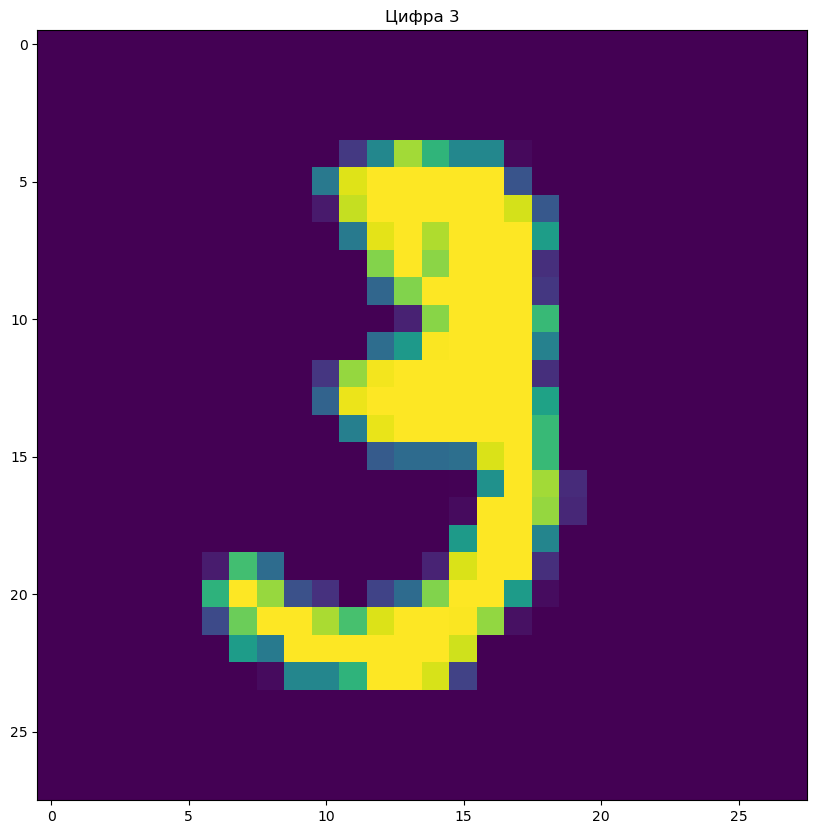

In [49]:
plt.figure(figsize = (10, 10))

plt.title(f'Цифра {mnist_train[10][1]}')
plt.imshow(mnist_train[10][0][0])

plt.show()

### Полносвязная нейронная сеть

In [51]:
def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x,y in tqdm(train_loader, desc = 'Train'):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    return train_loss

In [54]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc = 'Evaluation'):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total+=y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

In [56]:
def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize = (20, 10))

    plt.title(title + ' loss')

    plt.plot(train_loss, label = 'Train Loss')
    plt.plot(valid_loss, label = 'Valid Loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize = (20, 10))

    plt.title(title + ' accuracy')
    plt.plot(valid_accuracy)

    plt.grid()
    plt.show()

In [57]:
first_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(first_model.parameters(), lr = 1e-3)
loss_fn = nn.CrossEntropyLoss()

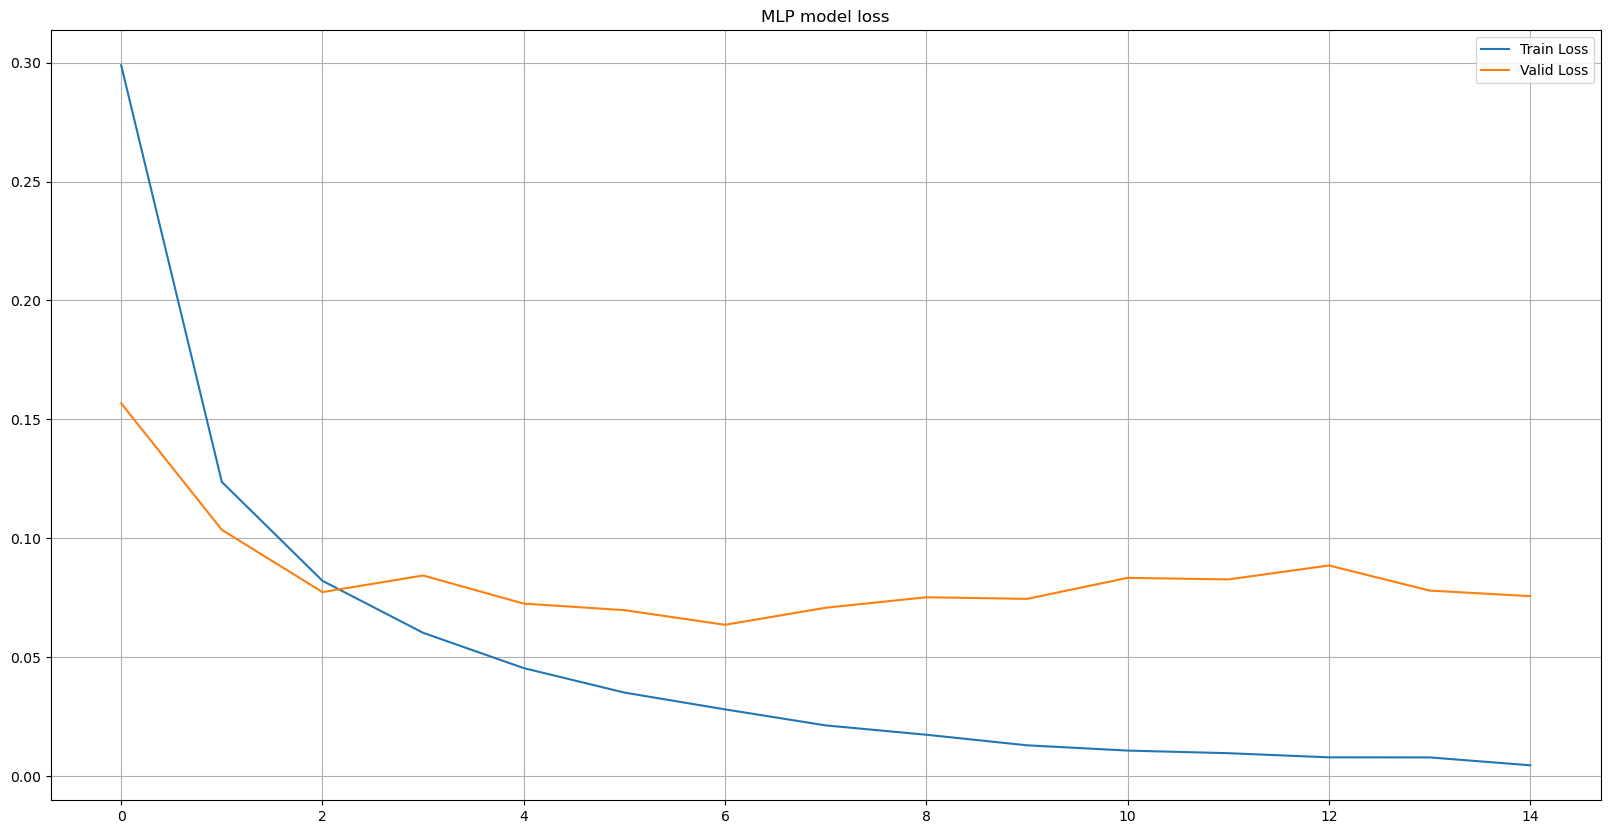

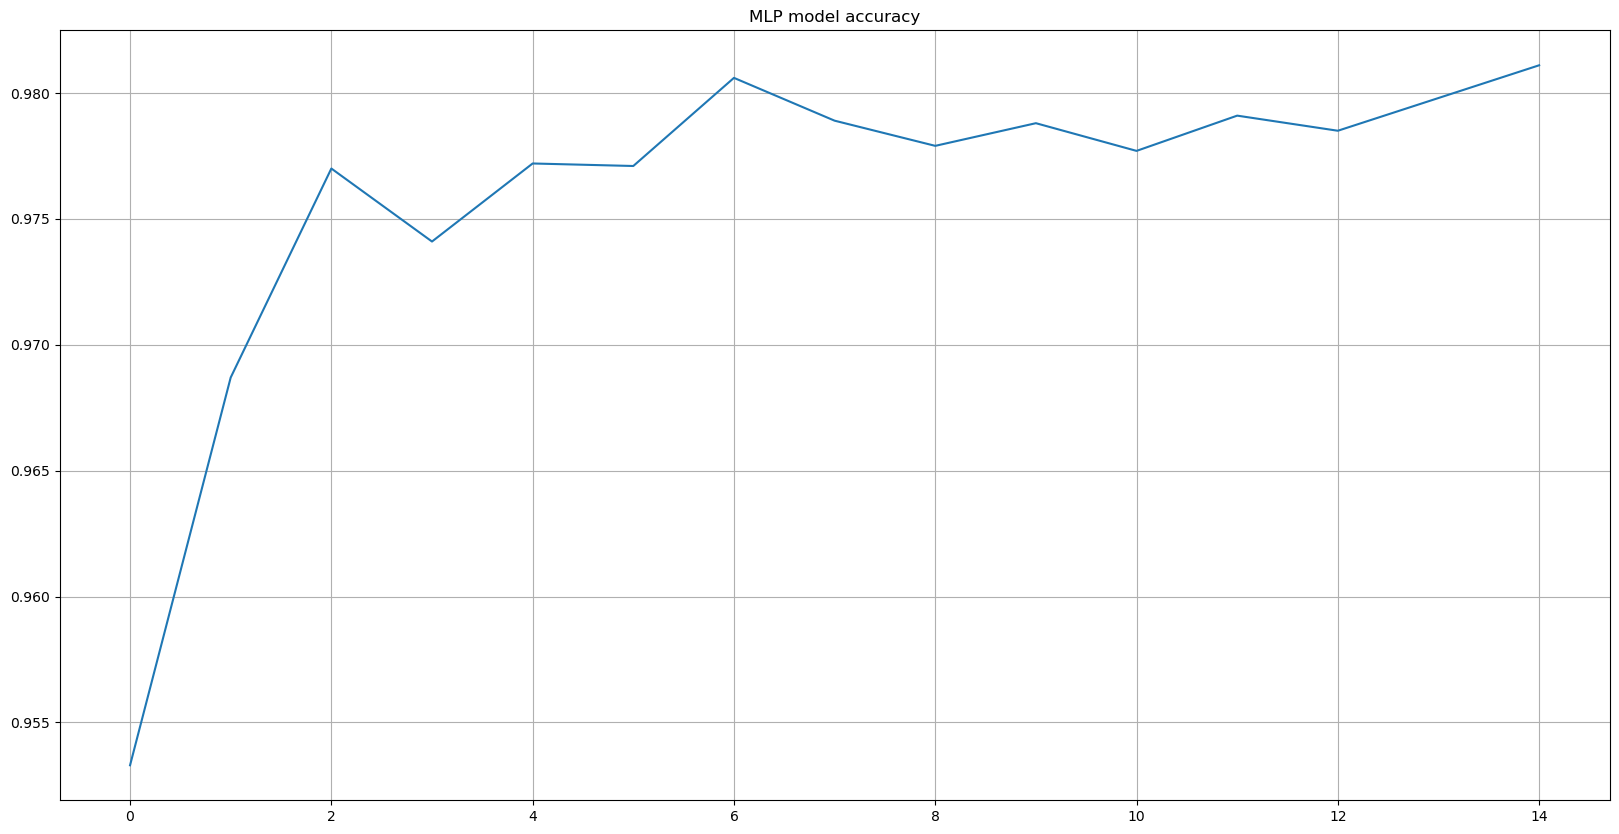

Total training and evaluation time: 393.22134


In [58]:
num_epochs = 15
train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(first_model)

    valid_loss, valid_accuracy = evaluate(first_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')

print(f'Total training and evaluation time: {perf_counter() - start:.5f}')

### Сверточная нейронная сеть

In [65]:
second_model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5), # было 28х28 - стало 24х24, 32 канала
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2), # было 24х24 - стало 12х12

    nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5), # было 12х12 - стало 8х8, 64 канала
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2), # было 8х8 - стало 4х4

    nn.Flatten(), # 64 канала, каждый 4х4
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimizer = torch.optim.Adam(second_model.parameters(), lr = 1e-3)

loss_fn = nn.CrossEntropyLoss()

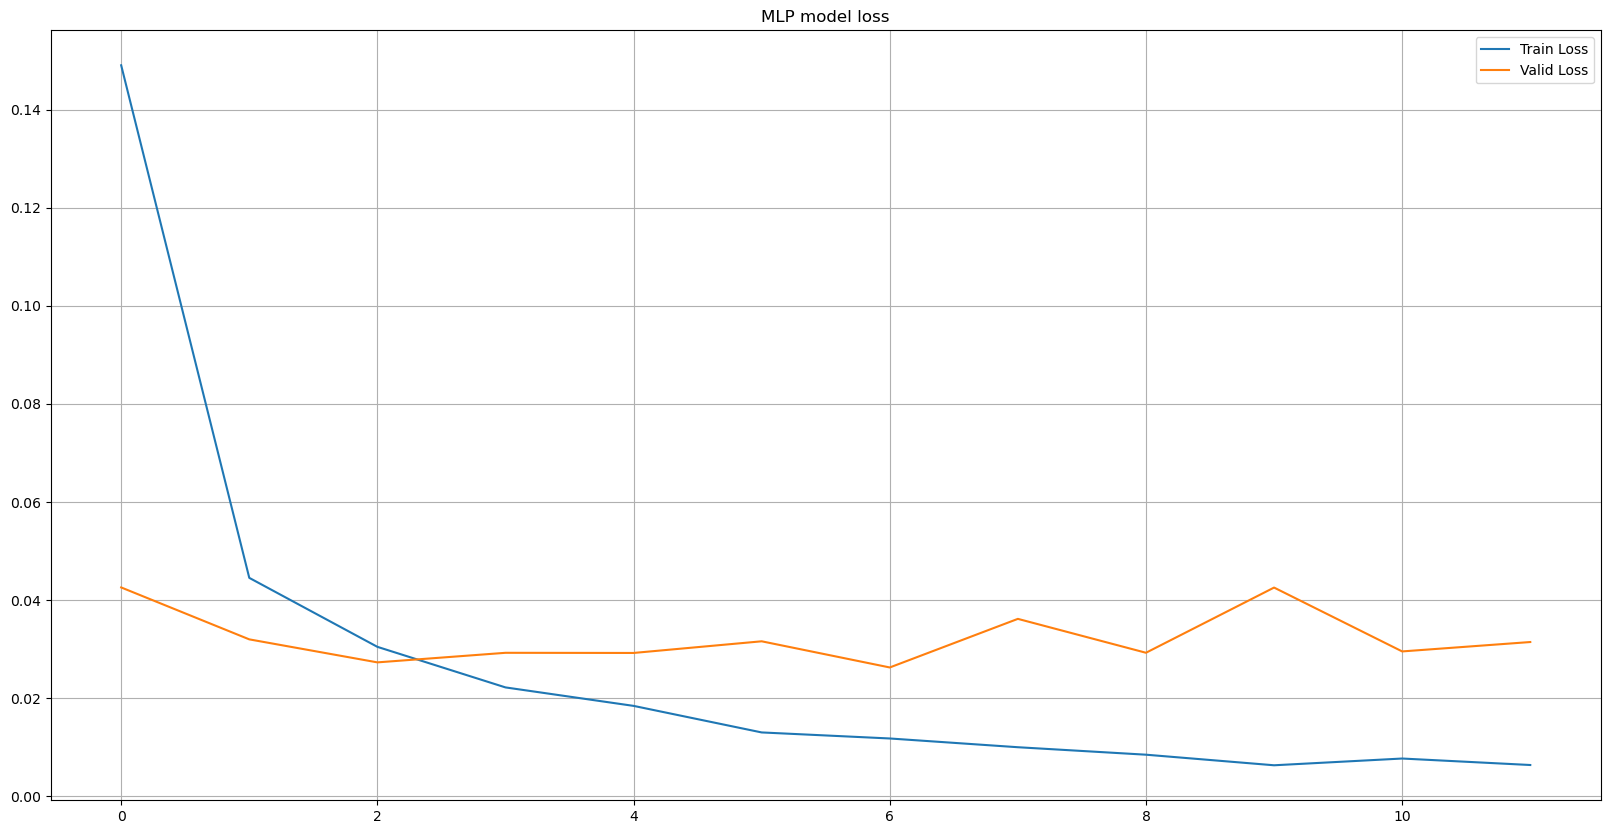

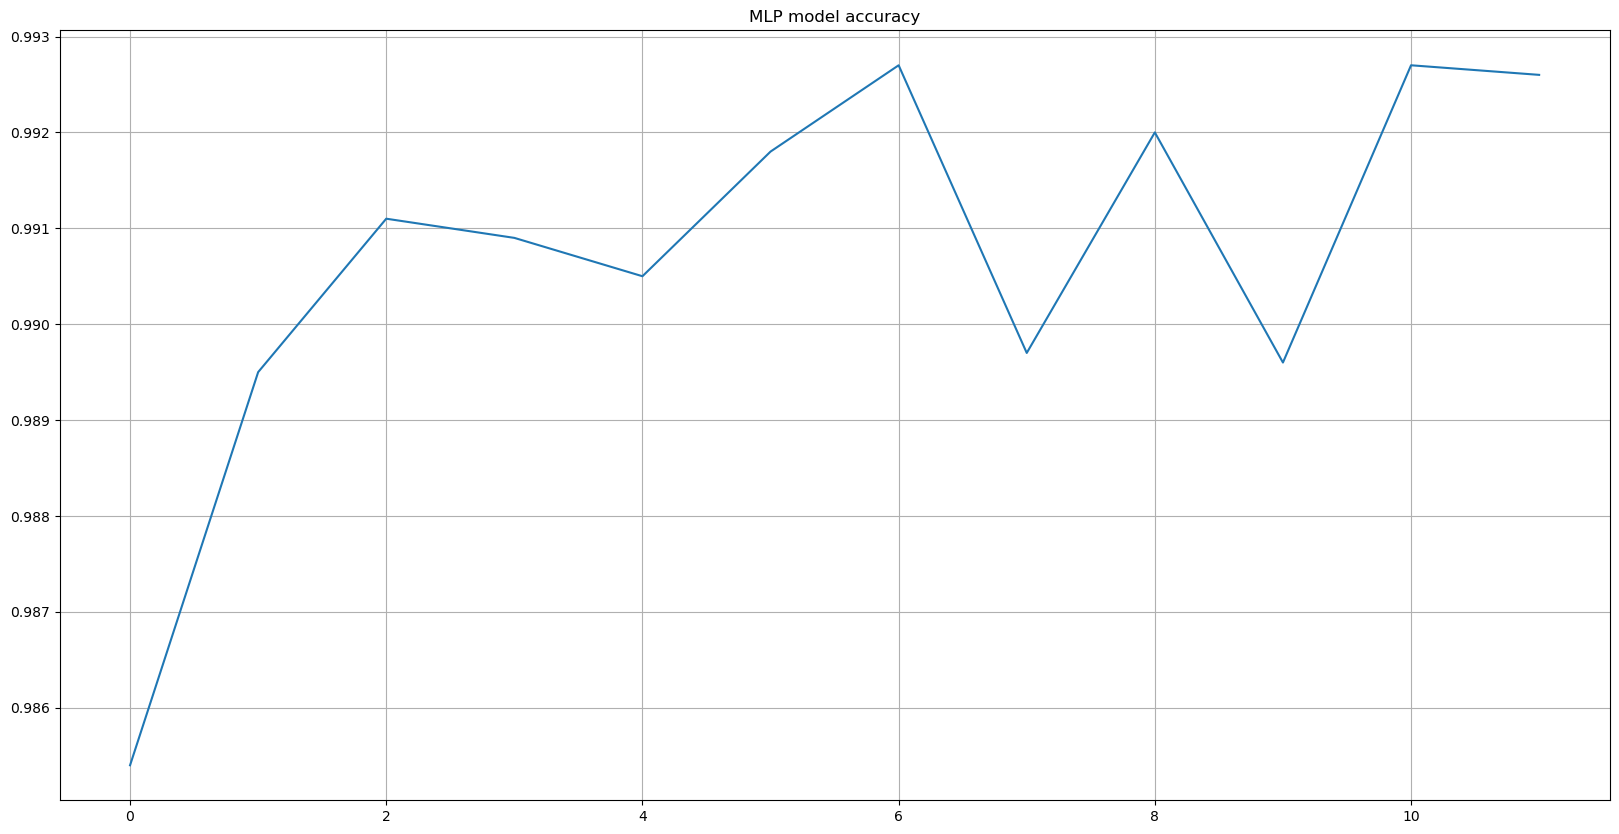

Train:  45%|████▌     | 424/938 [00:24<00:28, 17.78it/s]

In [ ]:
num_epochs = 15
train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(second_model)

    valid_loss, valid_accuracy = evaluate(second_model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')

print(f'Total training and evaluation time: {perf_counter() - start:.5f}')